## Solving the Radial Equation through the Use of RK4

#### Pseudocode
1. State constants and necessary libraries
2. Write potential function
3. Write function that is the array of the 1st and 2nd derivative
4. Implement the RK4 Method
5. Use while loop to minimize the energy to use the 'shooting method'

In [2]:
'''
The output of the code will be the energy levels of the states of hydrogen
'''

from numpy import array,arange #required for certain calculations
from numpy import pi

# Constants
m = 9.1094e-31     # Mass of electron
hbar = 1.0546e-34  # Planck's constant over 2*pi
e = 1.6022e-19     # Electron charge   
a= 5.29177e-11     #Bohr radius
#L = 2*a     # interval in the x-direction we are integrating in
L = 5.8*a
L0=.00001*a
N = 10000     #number of points taken
eps_0 = 8.85419e-12
h = (L-L0)/N     #step size
V0=50*e     #initial potential given in question

# Potential function
def V(x):
    return -e**2/(4*pi*eps_0*abs(x)) #this function plots the potential for a given x-value

#two 1st order ODEs we are using
def f(r,x,E):
    psi = r[0] #column where values of psi stored
    phi = r[1] #column where values of phi stored
    fpsi = phi #derivative of psi in relation to position (which is equal to phi)
    fphi = -(2*m/hbar**2)*(V(x)-E)*psi #derivative of phi in relation to x
    return array([fpsi,fphi],float) #includes the values of both derivatives

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 10**(-6) #initial value of psi at x=0
    phi = 1000 #initial value of phi at x=0
    r = array([psi,phi],float) #defines r which is the array that stores the psi and phi values

    #From this point, the 4th-order Runge-Kutta Method is used
    for x in arange(L0,L,h): #iterates through values of x from L0 to L
        k1 = h*f(r,x,E) #value of the derivatives of psi and phi at x
        k2 = h*f(r+0.5*k1,x+0.5*h,E) #second step where psi and phi calculated where wavefunction at half a step 
                                     #later calculated 
        k3 = h*f(r+0.5*k2,x+0.5*h,E) #third step where psi and phi calculated where wavefunction at half a step 
                                     #later calculated from k2
        k4 = h*f(r+k3,x+h,E) #4th step where function calculated a full step from k3
        r += (k1+2*k2+2*k3+k4)/6 #average values of the derivative multiplied by step size (1 day) to find integral

    return r[0]

# Main program to find the energy using the secant method
def Efunc(E2):
    E1=0.0 #set initial energy to 0
    psi2 = solve(E1) #determine wavefunction for initial energy
    target = e/1000 #granularity
    while abs(E1-E2)>target: #if the difference in energies btwn E1 and E2 is larger than the granularity/uncertainty
        psi1,psi2 = psi2,solve(E2) #find the wavefunctions for E1 and E2
        E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1) #redetermines E1 and E2 by changing E1 to E2 and calculating 
                                               #E2 by subtracting the relative difference in wavefunctions

    print("E =",E2/e,"eV")
    return E2
    
GHarm=Efunc(-10*e) 

E = -13.649994425925225 eV


In [3]:
def solvetograph(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)
    
    psipoints=[]

    for x in arange(L0, L,h): #redefinces interval where Runge Kutta used
        psipoints.append(r[0]) #psipoints records the value of the wavefunction at each x interval
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
        
    
    #trapz method
    integral = h*psipoints[0]
    for i in range(1,N):
        if psipoints[i]>0: #if the value of the wavefunction is positive
            integral += psipoints[i] #value is added to the integral
        else: #if the value of the wavefunction is negative
            integral -= psipoints[i]  #value is subtracted from the total integral
    
    return psipoints, integral #returns the values of the wavefunctions and the integral

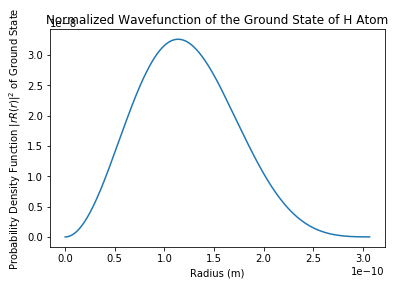

In [9]:
psiG, iG=solvetograph(GHarm)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import *

xpoints=np.arange(L,0,-L/N)

plt.plot(xpoints, (psiG/iG)**2)
plt.xlabel('Radius (m)')
plt.ylabel('Probability Density Function $|r R(r)|^2$ of Ground State')
plt.title('Normalized Wavefunction of the Ground State of H Atom')
plt.show()

In [7]:
def plot_polar_contour(values, azimuths, zeniths):
    """Plot a polar contour plot, with 0 degrees at the North.
 
    Arguments:
 
     * `values` -- A list (or other iterable - eg. a NumPy array) of the values to plot on the
     contour plot (the `z` values)
     * `azimuths` -- A list of azimuths (in degrees)
     * `zeniths` -- A list of zeniths (that is, radii)
 
    The shapes of these lists are important, and are designed for a particular
    use case (but should be more generally useful). The values list should be `len(azimuths) * len(zeniths)`
    long with data for the first azimuth for all the zeniths, then the second azimuth for all the zeniths etc.
 
    This is designed to work nicely with data that is produced using a loop as follows:
        
    """
 
    theta = np.radians(azimuths)
    zeniths = np.array(zeniths)
 
    values = np.array(values)
    values = values.reshape(len(azimuths), len(zeniths))
 
    r, theta = np.meshgrid(zeniths, np.radians(azimuths))
    fig, ax = subplots(subplot_kw=dict(projection='polar'))
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    spring()
    cax = ax.contour(theta, r, values, 30)
    spring()
    cb = fig.colorbar(cax)
    cb.set_label("Probability")
    
    fig.savefig("ElectricPotential.png")
    
 
    return fig, ax, cax

Text(0.5, 1.05, '2D Wave Function of the Ground State of the H Atom')

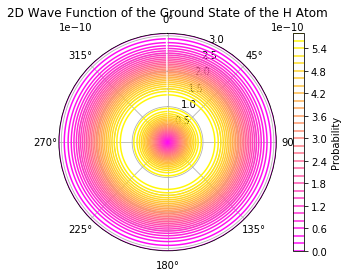

In [8]:
anglepoints=np.arange(0,360, 1)
values=[]
for i in range(len(anglepoints)):
    for j in range(len(psiG)):
        result=(psiG[j])
        values.append(result)
        
plot_polar_contour(values, anglepoints, xpoints)
plt.title('2D Wave Function of the Ground State of the H Atom')